####  Stock Market Analysis using LSTM

In [1]:
#Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
dataset=dataset.loc[::-1]

In [3]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


#### Training Dataset

In [4]:
train_set=dataset.iloc[:,1:2].values
print(train_set)

[[122.1 ]
 [120.3 ]
 [121.8 ]
 ...
 [240.  ]
 [234.55]
 [234.05]]


In [5]:
print(train_set.shape)

(2035, 1)


#### Normalizing dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(train_set)
scaled_training_set

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [9]:
X_train=[]
y_train=[]
for i in range(30,2035):
    X_train.append(scaled_training_set[i-30:i,0])
    y_train.append(scaled_training_set[i,30])
X_train=np.array(X_train)
y_train=np.array(y_train)

IndexError: index 30 is out of bounds for axis 1 with size 1

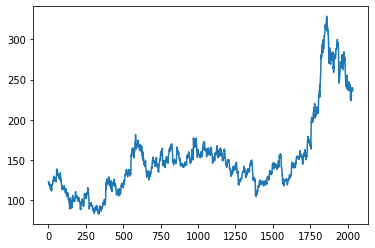

In [10]:
dataset_high = dataset.reset_index()['High'] #reset the index back to the default 0, 1, 2 etc
plt.plot(dataset_high)
plt.show()